<span><h1 style = "font-family: garamond; font-size: 60px; font-style: bold; letter-spcaing: 3px; background-color: #70c1b3; color :#247ba0; border-radius: 200px 200px; text-align:center">Week 4 Graded Assignment</h1></span>
This notebook aims at demonstrating the various topics learnt this week with the help of titanic dataset.

Please use the outline or collapse the header markdown blocks to quickly navigate to the desired section.


## Topics Covered this week

- Cross Validation
- Categorical Encoding
- Hyperparameter Tuning
- Decision Trees & Random forests
- Gradient Boost, XGBoost, AdaBoost, CatBoost, LightGBM
- K-Nearest Neighbors, k-means clustering


# **Introduction**


We are all acquainted with the Titanic, The Unsinkable Ship, which sailed its first and last voyage in 1912. Even though the Titanic was made not to sink, there weren't enough lifeboats for everyone. Hence, resulted in the death of 1502 out of 2224 passengers and crew.

The Titanic Dataset link is a dataset curated on the basis of the passengers on titanic, like their age, class, gender, etc to predict if they would have survived or not. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


## Data Description

- <code>Survived</code>: Whether the person survived (0 = No, 1 = Yes)
- <code>Pclass</code>: Ticket class
- <code>Sex</code>: Sex of the passenger
- <code>Age</code>: Age in years
- <code>SibSp</code>: Number of siblings / spouses aboard the Titanic
- <code>ParCh</code>: Number of parents / children aboard the Titanic
- <code>Ticket</code>: Ticket number
- <code>Fare</code>: Passenger fare
- <code>Cabin</code>: Cabin number
- <code>Embarked</code>: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


## Importing Libraries


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.autolayout"] = True

In [38]:
# Importing sklearn modules
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Importing models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

print("Setup Completed!")

Setup Completed!


# **Data Preprocessing**


## 1. Importing and setting up dataframe


In [39]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   ParCh        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2. **Handling Missing Data**


We will use a heatmap to see which values are missing at a glance


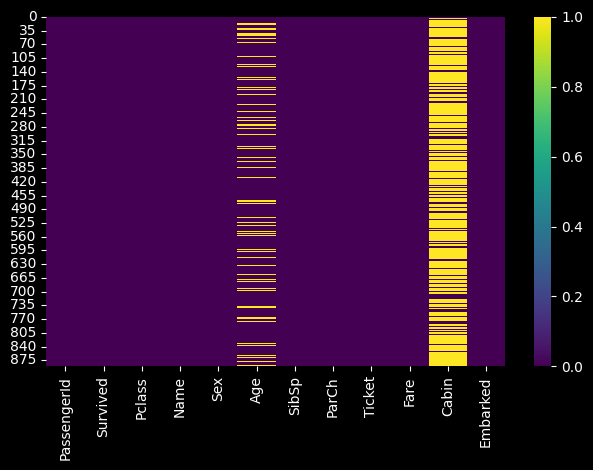

In [41]:
sns.heatmap(df.isna(),cmap='viridis')
plt.show()

- As almost all the entires of the "Cabin" column are missing and it does not have much correlation with our target variable, we will drop it altogether
- A few of the entries for age are missing as well, and we have a few options:
  - Fill the missing values with a central measure
  - Drop the Age column
  - Drop the entries with missing age
  - Build a separate model to predict the age
- Here I chose to fill the missing entries with the median
- A couple entries for Embarked are missing as well, but we can safely drop them


In [42]:
median_age = df["Age"].median()
df['Age'].fillna(median_age, inplace=True)
df.drop(['Cabin'],axis=1,inplace=True)
df.dropna(how='any',axis=0,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Making sure no null values remain


In [43]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
ParCh          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 3. Encoding Categorical Variables

Categorical encoding converts categorical data into numerical values so that machine learning algorithms can process it effectively.

Here I have used **One-Hot Encoding**


In [44]:
# Checking the number of unique values for each variable
df.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
ParCh            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

It is difficult to deal with categorical values with large number of categories, and here "PassengerId", "Name" and "Ticket" columns do not have much correlation with our target variable, so we will drop them.


In [45]:
# Dropping categorical variables with 100+ values
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [46]:
# One-Hot Encoding
df = pd.get_dummies(data=df)
df.head()

,Survived,Pclass,Age,SibSp,ParCh,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


# **Choosing the best model**

Now that we have our data ready for analysis, we will look at some classifying models and try to determine which one is best

- We will look at the _accuracy_, _classification matrix_ and _ROC curve_
- **Cross Validation** will give us a better idea about performance
- Furthermore, we shall tune our **hyperparamenters** to try to achieve better results from each model


In [47]:
# Splitting the training and testing data

X = df.drop('Survived',axis=1)
y = df.Survived
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)


In [48]:
# Normalizing the data to increase accuracy

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

## **Random Forest**

Random Forest is an ensemble learning method used for classification and regression tasks. It operates by constructing multiple decision trees during training and outputting the class (classification) or mean prediction (regression) of the individual trees.


In [49]:
forest = RandomForestClassifier(random_state=2024)
forest.fit(X_train_scaled,y_train)
y_pred_forest = forest.predict(X_test_scaled)

In [50]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       146
           1       0.83      0.74      0.78        77

    accuracy                           0.86       223
   macro avg       0.85      0.83      0.84       223
weighted avg       0.85      0.86      0.85       223



In [51]:
scores = cross_val_score(forest, X_train_scaled, y_train, cv = 5)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [0.86567164 0.84210526 0.81203008 0.7593985  0.71428571]
Average cross-validation score: 0.7986982381326451


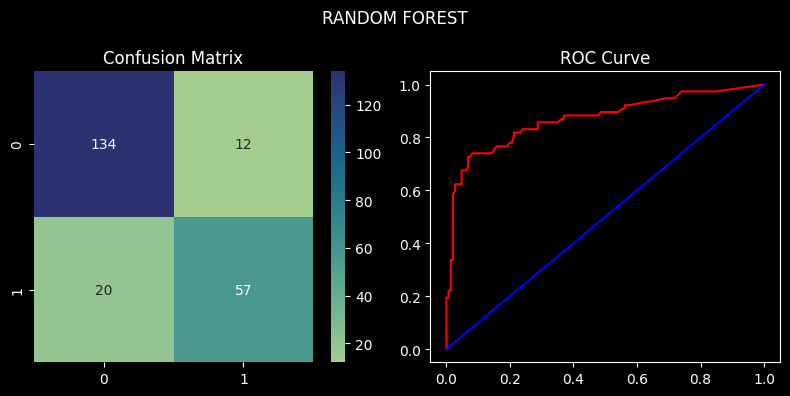

In [52]:
# Plotting Confusion Matrix and ROC Curve

f, axes = plt.subplots(1, 2,figsize=(8,4))
f.suptitle('RANDOM FOREST')

conf = confusion_matrix(y_test,y_pred_forest)
sns.heatmap(conf,annot=True,fmt='d',cmap='crest',ax=axes[0])
axes[0].set_title("Confusion Matrix")

y_pred_prob = forest.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr,tpr,'-r',)
plt.plot([0,1], [0,1], '-b' )
axes[1].set_title('ROC Curve')

plt.show()

In [53]:
# Define the parameter distribution
param_dist = {
    'n_estimators': [25,50,75,100],
    'max_depth': [10, 20, 30, None]
}

# Create a RandomizedSearchCV
forest_search = RandomizedSearchCV(estimator=forest, param_distributions=param_dist,cv = 5)

# Fit the model
forest_search.fit(X_scaled, y)

# Print the best parameters and best score
print(f"Best parameters: {forest_search.best_params_}")
print(f"Best cross-validation score: {forest_search.best_score_}")

Best parameters: {'n_estimators': 25, 'max_depth': 10}
Best cross-validation score: 0.8290420872214816


## **AdaBoost**

AdaBoost, or Adaptive Boosting, is an ensemble learning algorithm that combines multiple weak classifiers, typically decision trees, to create a strong classifier by sequentially adjusting the weights of misclassified instances. It focuses on difficult cases by giving them higher weights, thus improving the overall model accuracy.


In [54]:
ada = AdaBoostClassifier(random_state=2024)
ada.fit(X_train_scaled,y_train)
y_pred_ada = ada.predict(X_test_scaled)

In [55]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       146
           1       0.80      0.74      0.77        77

    accuracy                           0.85       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.85      0.85      0.85       223



In [56]:
scores = cross_val_score(ada, X_train_scaled, y_train, cv = 5)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [0.76865672 0.84210526 0.78947368 0.78947368 0.7443609 ]
Average cross-validation score: 0.7868140500504993


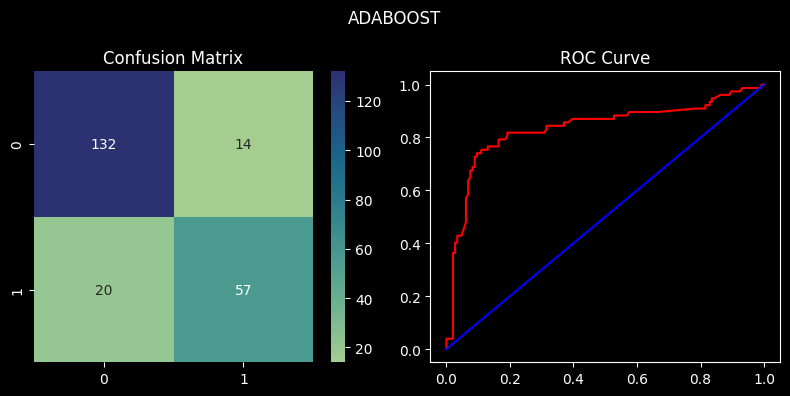

In [57]:
# Plotting Confusion Matrix and ROC Curve

f, axes = plt.subplots(1, 2,figsize=(8,4))
f.suptitle('ADABOOST')

conf = confusion_matrix(y_test,y_pred_ada)
sns.heatmap(conf,annot=True,fmt='d',cmap='crest',ax=axes[0])
axes[0].set_title("Confusion Matrix")

y_pred_prob = ada.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr,tpr,'-r',)
plt.plot([0,1], [0,1], '-b' )
axes[1].set_title('ROC Curve')

plt.show()

In [58]:
# Define the parameter distribution
param_dist = {
    'n_estimators': [25,50,75,100],
    'learning_rate': [0.05,0.1,0.2,0.5]
}

# Create a RandomizedSearchCV
ada_search = RandomizedSearchCV(estimator=ada, param_distributions=param_dist,cv = 5)

# Fit the model
ada_search.fit(X_scaled, y)

# Print the best parameters and best score
print(f"Best parameters: {ada_search.best_params_}")
print(f"Best cross-validation score: {ada_search.best_score_}")

Best parameters: {'n_estimators': 50, 'learning_rate': 0.5}
Best cross-validation score: 0.8043039421062655


## **Histogram-Based Gradient Boosting** (similar to LightGBM)

Histogram-based Gradient Boosting is an efficient implementation of gradient boosting that uses histograms to approximate continuous feature values, resulting in faster training and lower memory usage. It builds decision trees by grouping feature values into discrete bins, significantly speeding up the computation and handling large datasets effectively.


In [59]:
histgb = HistGradientBoostingClassifier(random_state=2024)
histgb.fit(X_train_scaled,y_train)
y_pred_histgb = histgb.predict(X_test_scaled)

In [60]:
scores = cross_val_score(histgb, X_train_scaled, y_train, cv = 5)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [0.87313433 0.84210526 0.83458647 0.7593985  0.73684211]
Average cross-validation score: 0.8092133318370553


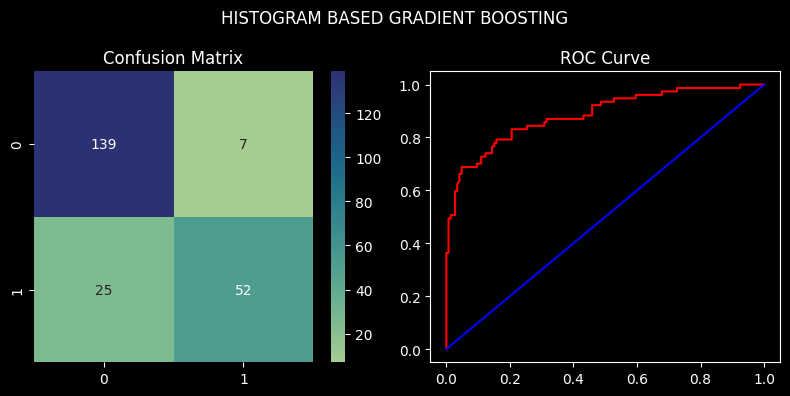

In [61]:
# Plotting Confusion Matrix and ROC Curve

f, axes = plt.subplots(1, 2,figsize=(8,4))
f.suptitle('HISTOGRAM BASED GRADIENT BOOSTING')

conf = confusion_matrix(y_test,y_pred_histgb)
sns.heatmap(conf,annot=True,fmt='d',cmap='crest',ax=axes[0])
axes[0].set_title("Confusion Matrix")

y_pred_prob = histgb.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr,tpr,'-r',)
plt.plot([0,1], [0,1], '-b' )
axes[1].set_title('ROC Curve')

plt.show()

In [62]:
# Define the parameter distribution
param_dist = {
    'max_depth': [4,8,16,32],
    'learning_rate': [0.01,0.02,0.05,0.1]
}

# Create a GridSearchCV
histgb_search = GridSearchCV(estimator=histgb, param_grid=param_dist,cv = 5)

# Fit the model
histgb_search.fit(X_scaled, y)

# Print the best parameters and best score
print(f"Best parameters: {histgb_search.best_params_}")
print(f"Best cross-validation score: {histgb_search.best_score_}")

Best parameters: {'learning_rate': 0.05, 'max_depth': 32}
Best cross-validation score: 0.8380371992636324


## **K-Nearest Neighbours**

K-Nearest Neighbors (KNN) is a simple, non-parametric algorithm used for classification and regression that predicts the label of a data point based on the majority label (classification) or average (regression) of its k nearest neighbors in the feature space. It relies on distance metrics to identify the nearest neighbors, making it sensitive to the choice of k and the scale of the data.


In [63]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [64]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       146
           1       0.84      0.66      0.74        77

    accuracy                           0.84       223
   macro avg       0.84      0.80      0.81       223
weighted avg       0.84      0.84      0.83       223



In [65]:
scores = cross_val_score(knn, X_train_scaled, y_train, cv = 5)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [0.82835821 0.86466165 0.82706767 0.78195489 0.7593985 ]
Average cross-validation score: 0.8122881831444282


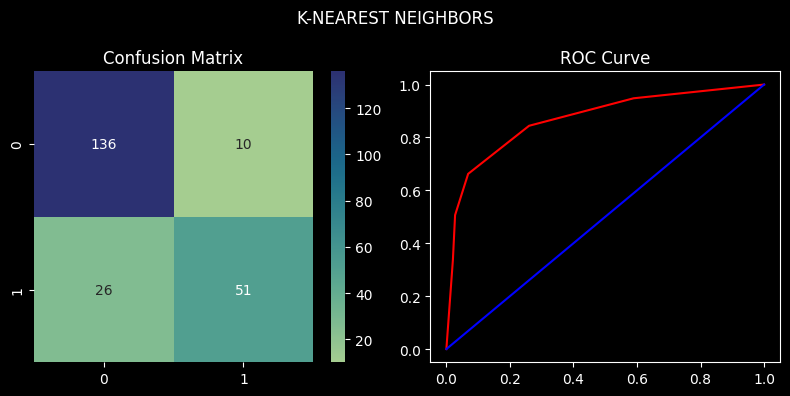

In [66]:
# Plotting Confusion Matrix and ROC Curve

f, axes = plt.subplots(1, 2,figsize=(8,4))
f.suptitle('K-NEAREST NEIGHBORS')

conf = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(conf,annot=True,fmt='d',cmap='crest',ax=axes[0])
axes[0].set_title("Confusion Matrix")

y_pred_prob = knn.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr,tpr,'-r',)
plt.plot([0,1], [0,1], '-b' )
axes[1].set_title('ROC Curve')

plt.show()

In [67]:
# Defining the parameter distribution
param_dist = {
    'n_neighbors': [1,5,20,30,50,60],
    'weights':['uniform','distance']
}

# Create a GridSearchCV
knn_search = GridSearchCV(estimator=knn, param_grid=param_dist,cv = 5)

# Fit the model
knn_search.fit(X_scaled, y)

# Print the best parameters and best score
print(f"Best parameters: {knn_search.best_params_}")
print(f"Best cross-validation score: {knn_search.best_score_}")

Best parameters: {'n_neighbors': 20, 'weights': 'uniform'}
Best cross-validation score: 0.8155335491652383


## Adding some more (unoptimised) models for comparison


In [68]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled,y_train)
y_pred_logreg = knn.predict(X_test_scaled)
logreg_score = cross_val_score(logreg, X_train_scaled, y_train, cv = 5).mean()
logreg_score

0.7867354954550555

In [69]:
gradboost = GradientBoostingClassifier(learning_rate=0.3)
gradboost.fit(X_train_scaled,y_train)
y_pred_gradboost = gradboost.predict(X_test_scaled)
gradboost_score = cross_val_score(gradboost, X_train_scaled, y_train, cv = 5).mean()
gradboost_score

0.8092694422623723

In [70]:
svm = SVC()
svm.fit(X_train_scaled,y_train)
y_pred_svm = svm.predict(X_test_scaled)
svm_score = cross_val_score(svm, X_train_scaled, y_train, cv = 5).mean()
svm_score

0.8152732577712939

## **Comparing Performance**

Now we compare the best cross validation score for different models


In [71]:
best_scores = pd.DataFrame({"model":["Random Forest","AdaBoost","HistGradientBoosting","K-Nearest Neighbors","Logistic Regression","Gradient Boost","SVM"],
                            "score":[forest_search.best_score_,ada_search.best_score_,histgb_search.best_score_,knn_search.best_score_,logreg_score,gradboost_score,svm_score]})


We will arrange models in order of decreasing score (i.e. best to worst)


In [72]:
best_scores.sort_values("score",ascending=False)

,model,score
2,HistGradientBoosting,0.838037
0,Random Forest,0.829042
3,K-Nearest Neighbors,0.815534
6,SVM,0.815273
5,Gradient Boost,0.809269
1,AdaBoost,0.804304
4,Logistic Regression,0.786735


# **Conclusion**

From our analysis we can see that **Histogram Based Gradient Boosting** had the highest score


## Thank you for reading!

This was a super fun assignment :)

(P.S. If not for the time constraint, I would have loved to do some EDA on this dataset, as well as test more models with better fine tuning)
